In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

2024-06-11 18:35:21.814324: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Declare parameters
Number_of_features = 2
Number_of_units = 1  # indicates number of neurons

In [3]:
# Declare the Weights and Bias
weights = tf.Variable(tf.zeros([Number_of_features, Number_of_units]))  # initializing to zero
bias = tf.Variable(tf.zeros([Number_of_units]))  # Initializing the bias to zero

2024-06-11 18:35:49.777863: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
# Define the Perceptron Function
def perceptron(x):
    I = tf.add(tf.matmul(x, weights), bias)  # Computes the matrix multiplication of x and weight
    output = tf.sigmoid(I)  # Calculates the output using the Sigmoid activation function
    return output

In [6]:
# Define the Loss Function and Optimizer
def individual_loss():
    return abs(tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=perceptron(x))))

optimizer = tf.keras.optimizers.Adam(.01)

In [7]:
# Read in the Data
df = pd.read_csv('data/training_data.csv')
df.head()

,label,x1,x2
0,1,2.6487,4.5192
1,1,1.5438,2.4443
2,1,1.8990,4.2409
3,1,2.4711,5.8097
4,1,3.3590,6.4423


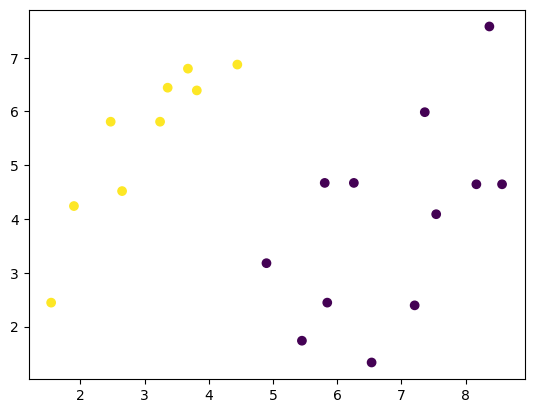

In [8]:
# Visualization of labels
plt.scatter(df.x1, df.x2, c=df.label)

In [10]:
# Prepare Inputs
x_input = df[['x1', 'x2']].to_numpy()
y_label = df[['label']].to_numpy()
x_input

array([[2.6487, 4.5192],
       [1.5438, 2.4443],
       [1.899 , 4.2409],
       [2.4711, 5.8097],
       [3.359 , 6.4423],
       [3.2406, 5.8097],
       [3.8128, 6.3917],
       [4.4441, 6.8725],
       [3.6747, 6.7966],
       [7.5417, 4.0891],
       [7.2063, 2.3937],
       [6.5355, 1.331 ],
       [5.4503, 1.7358],
       [5.8449, 2.4443],
       [4.8979, 3.1781],
       [5.8055, 4.6711],
       [7.3641, 5.9868],
       [6.2592, 4.6711],
       [8.3703, 7.581 ],
       [8.5676, 4.6457],
       [8.1676, 4.6457]])

In [11]:
# Initialize variables
x = tf.Variable(x_input)
x = tf.cast(x, tf.float32)
y = tf.Variable(y_label)
y = tf.cast(y, tf.float32)

In [13]:
# Train the model
for i in range(1000):
    optimizer.minimize(individual_loss, [weights, bias])

In [16]:
# New Values for Weights and Bias
tf.print(weights)
tf.print(bias)

[[-2.42329025]
 [1.85045195]]
[1.74988222]


In [18]:
# View the Final Loss
final_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=perceptron(x)))
tf.print(final_loss)

0.534005582


In [23]:
# Predicting using the trained model
y_prediction = perceptron(x)
y_prediction_round = tf.round(y_prediction) # Round off the output value to 1 or 0, to make the comparison with the target easier

In [24]:
# Evaluate the Model
accuracy_score(y, y_prediction_round)

1.0

In [25]:
# Generate the confusion matrix 
confusion_matrix(y, y_prediction_round)

array([[12,  0],
       [ 0,  9]])